# Entropy(Tergetclass =E)=-sumition(pi long2 pi)

##### Ex: -((p1 long2 p1)+(p2 long2 p2))

# Gain=Tergetclass E-(sumition(p*Entropy))

##### Ex:E-((p1*E1)+(p2*E2+....))

### RootNode=Maximum Gain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ds=pd.read_csv('treet.csv')
ds.head()

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,indoor,No
1,2,Sunny,Warm,Outdoor,No
2,3,Cloudy,Warm,indoor,No
3,4,Sunny,Warm,indoor,No
4,5,Cloudy,Cold,indoor,Yes


In [3]:
ds.shape

(7, 5)

In [4]:
ds.isnull().sum()

Days            0
Outlook         0
Temperature     0
Routine         0
Wear Jacket?    0
dtype: int64

In [5]:
ds=ds.drop('Days',axis=1)
ds.head()

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,indoor,No
1,Sunny,Warm,Outdoor,No
2,Cloudy,Warm,indoor,No
3,Sunny,Warm,indoor,No
4,Cloudy,Cold,indoor,Yes


In [14]:
x=ds.iloc[:,:-1]
y=ds.iloc[:,-1]
y

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
Name: Wear Jacket?, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [18]:
x.Outlook=label.fit_transform(x['Outlook'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
x.Temperature=label.fit_transform(x['Temperature'])
x.Routine=label.fit_transform(x['Routine'])
x

,Outlook,Temperature,Routine
0,1,0,1
1,1,1,0
2,0,1,1
3,1,1,1
4,0,0,1
5,0,0,0
6,1,0,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()

In [29]:
tr.fit(x,y)

DecisionTreeClassifier()

In [30]:
tr.predict([[1,1,0]])

array(['No'], dtype=object)

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

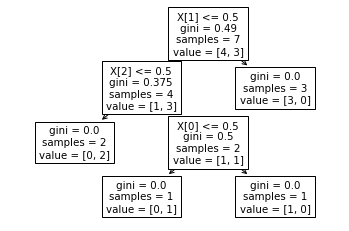

In [34]:
from sklearn import tree
tree.plot_tree(tr)

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

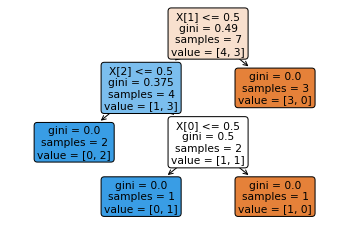

In [35]:
tree.plot_tree(tr,filled=True,rounded=True)

[Text(200.88000000000002, 190.26, 'Temperature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

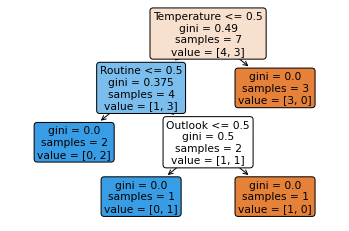

In [36]:
tree.plot_tree(tr,filled=True,rounded=True,feature_names=x.columns)

In [40]:
x.columns

Index(['Outlook', 'Temperature', 'Routine'], dtype='object')

### second project

In [41]:
df=pd.read_csv('dtree.csv')
df.head()

,height,weight,shoe size,gender
0,181,80,44,male
1,177,70,43,female
2,160,60,38,female
3,154,54,37,female
4,166,65,40,male


In [42]:
df.shape

(10, 4)

In [43]:
df.isnull().sum()

height       0
weight       0
shoe size    0
gender       0
dtype: int64

In [45]:
x=df.drop('gender',axis=1)
x

,height,weight,shoe size
0,181,80,44
1,177,70,43
2,160,60,38
3,154,54,37
4,166,65,40
5,190,90,47
6,175,64,39
7,171,75,42
8,185,85,43
9,169,71,42


In [46]:
y=df.iloc[:,-1]
y

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7    female
8    female
9      male
Name: gender, dtype: object

In [47]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [49]:
dc.fit(x,y)

DecisionTreeClassifier()

In [50]:
dc.predict([[185,85,43]])

array(['female'], dtype=object)

In [54]:
dc.predict([[166,72,42]])

array(['male'], dtype=object)

In [55]:
x.columns

Index(['height', 'weight', 'shoe size'], dtype='object')

[Text(111.60000000000001, 195.696, 'shoe size <= 38.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(167.4, 152.208, 'weight <= 67.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.20000000000002, 108.72, 'shoe size <= 43.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(167.4, 65.232, 'height <= 170.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

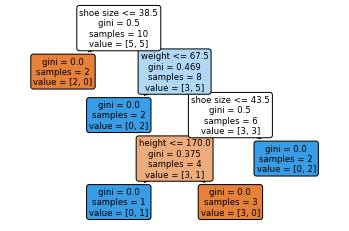

In [57]:
from sklearn import tree
tree.plot_tree(dc,filled=True,rounded=True,feature_names=x.columns)

### third project

In [58]:
df=pd.read_csv('stree.csv')
df.head()

,age,imcome,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [59]:
df.isnull().sum()

age         0
imcome      0
gender      0
m_status    0
buys        0
dtype: int64

In [60]:
x=df.iloc[:,:-1]
x.head()

,age,imcome,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [61]:
y=df['buys']
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: buys, dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder


In [75]:
x=x.apply(LabelEncoder().fit_transform)

In [76]:
x.head()

,age,imcome,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [78]:
dt.fit(x,y)

DecisionTreeClassifier()

In [79]:
dt.predict([[0,0,1,1]])

array(['yes'], dtype=object)